In [1]:
#Lets import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv to pandas dataframe
netflix = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
netflix.columns.nunique()

12

In [6]:
netflix.columns.value_counts().unique()

array([1], dtype=int64)

In [10]:
#print no. rows and columsn in dataset
netflix.shape

(8807, 12)

In [11]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
#lets find the missing values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handling missing value

In [14]:
#filling the cast column as unknown
netflix['cast'].fillna('Unknown',inplace=True)

In [15]:
#filling country column with unknow
netflix['country'].fillna('Unknown',inplace=True)

In [17]:
#lets drop the columnn rating duration and date_added as itdoes not signifies
netflix.dropna(subset=['duration','rating','date_added'],inplace=True)

### Creating a new columns Year & Month

In [20]:
data = netflix.copy()
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['month_added'] = data['date_added'].apply(lambda x :  x.split(' ')[-3])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [21]:
data.rename(columns={'type':'Type'},inplace=True)

In [22]:
data.isnull().sum()

show_id         0
Type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [23]:
data.head()

,show_id,Type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,NULL,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,NULL,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


### Data Visualization

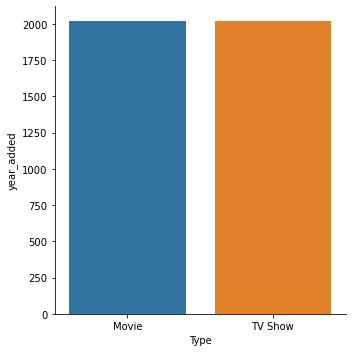

In [37]:
sns.catplot(x='Type',y='year_added',kind='bar',data=data)

<AxesSubplot:ylabel='Type'>

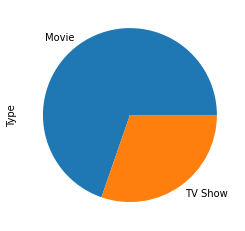

In [41]:
data.Type.value_counts(normalize=True).plot(kind='pie')

In [43]:
data.release_year.value_counts().sort_index(ascending=False)

2021     592
2020     953
2019    1030
2018    1146
2017    1030
        ... 
1945       4
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 74, dtype: int64

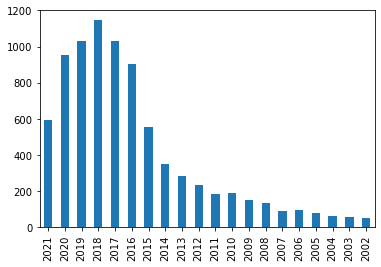

In [47]:
net_year = data.release_year.value_counts().sort_index(ascending=False).head(20).plot(kind='bar')

The plot depicts the number of movies and TV shows that are released in a given year.

<AxesSubplot:xlabel='count'>

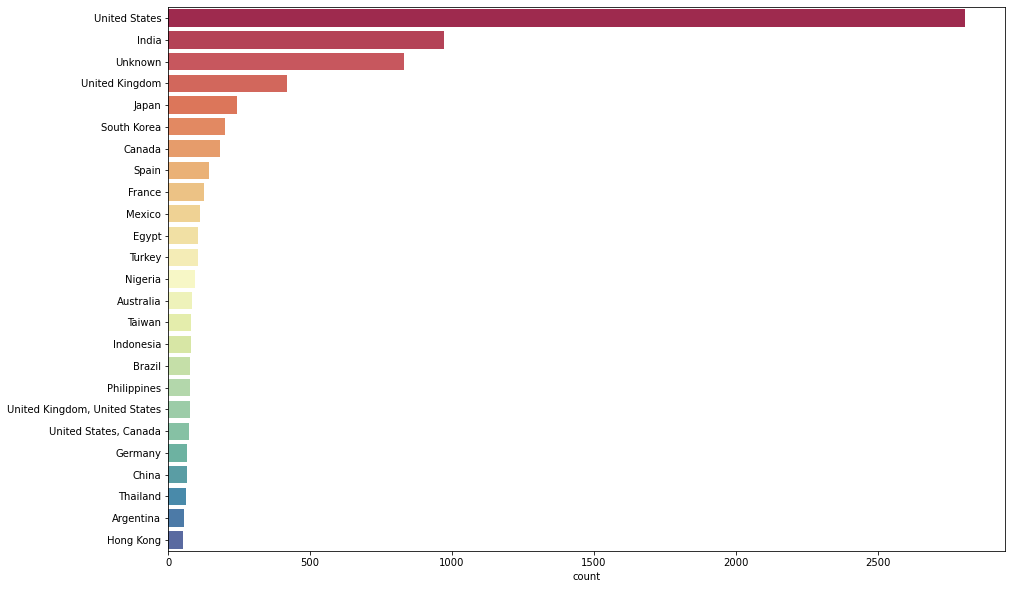

In [48]:
temp1 =data.set_index('title').country.str.split(' ,', expand=True).stack().reset_index(level=1,drop=True)

plt.figure(figsize=(15,10))
sns.countplot(y = temp1,order=temp1.value_counts().index[:25],palette='Spectral')

The plot depicts the number of movies and TV shows released by the country.


The United States ranked first in terms of the number of movies and TV shows available, followed by India.